In [1]:
## Version numbers listed next to each package:

# Data location and access packages:
import earthaccess                                 # 0.6.1

# Analysis packages:
import xarray as xr                                # 2023.9.0
import numpy as np                                 # 1.26.0
import xeofs as xe                                 # 1.1.0

# Visualization packages:
import matplotlib.pyplot as plt                    # 3.8.0
from cartopy.crs import EqualEarth, PlateCarree    # 0.22.0

# Cloud computing / dask packages:
import coiled

%matplotlib inline


libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [2]:
xr.set_options( # display options for xarray objects
    display_expand_attrs=False,
    display_expand_coords=True,
    display_expand_data=True,
)

In [3]:
earthaccess.login() # Login with your credentials

Enter your Earthdata Login username:  deanh808
Enter your Earthdata password:  ········


In [5]:
datainfo = earthaccess.search_data(
    short_name="MUR-JPL-L4-GLOB-v4.1",
    cloud_hosted=True,
    #temporal=("1910-01-01", "2008-02-01"), # We only want till end of 2007, but this ending date was required to obtain that.
    )

Granules found: 7904


# Test out a file

In [50]:
# Generate file objects from the endpoints which are compatible with Xarray:
fileobj_test = earthaccess.open([datainfo[0]])[0]
sst_test = xr.open_dataset(fileobj_test)['analysed_sst']

Opening 1 granules, approx size: 0.32 GB
using endpoint: https://archive.podaac.earthdata.nasa.gov/s3credentials


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
lat_region = (30, 45)
lon_region = (-135, -105)

lat_points = (38, 38, 38, 38)
lon_points = (-123.25, -125, -128, -132)

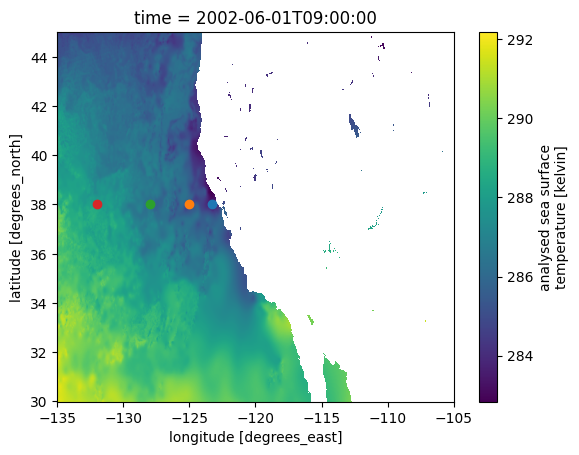

In [65]:
fig = plt.figure()
sst_test.sel(lat=slice(*lat_region), lon=slice(*lon_region)).plot()

for lat, lon in zip(lat_points, lon_points):
    plt.scatter(lon, lat)

# Mean seasonal cycle for larger portion of dataset

In [24]:
datainfo_thinned = datainfo[:4000]
datainfo_thinned = [datainfo[i] for i in range(len(datainfo_thinned)) if i%7==0]
#datainfo_thinned = [datainfo[i] for i in range(len(datainfo)) if i%7==0]

In [25]:
%%time
# Generate file objects from the endpoints which are compatible with Xarray:
fileobjs = earthaccess.open(datainfo_thinned)

Opening 572 granules, approx size: 190.74 GB
using endpoint: https://archive.podaac.earthdata.nasa.gov/s3credentials


QUEUEING TASKS | :   0%|          | 0/572 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/572 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/572 [00:00<?, ?it/s]

CPU times: user 821 ms, sys: 28.6 ms, total: 850 ms
Wall time: 1.06 s


In [26]:
cluster = coiled.Cluster(
    n_workers=25, 
    account="podaac-science", 
    region="us-west-2", 
    worker_memory="4 GiB",
    worker_cpu=2, 
    #worker_vm_types=,
    #name='podaac-science-97f6e23f'
    ) 
client = cluster.get_client()

Output()

╭────────────────────────────────────────── Package Info ──────────────────────────────────────────╮
│                                ╷                                                                 │
│   Package                      │ Note                                                            │
│ ╶──────────────────────────────┼───────────────────────────────────────────────────────────────╴ │
│   Babel                        │ https://pypi.org/pypi                                           │
│   Cartopy                      │ https://pypi.org/pypi                                           │
│   Deprecated                   │ https://pypi.org/pypi                                           │
│   Jinja2                       │ https://pypi.org/pypi                                           │
│   MarkupSafe                   │ https://pypi.org/pypi                                           │
│   Pillow                       │ https://pypi.org/pypi                                           │
│   PyNaCl                       │ https://pypi.org/pypi                                           │
│   PyYAML                       │ https://pypi.org/pypi                                           │
│   Pygments                     │ https://pypi.org/pypi                                           │
│   Send2Trash                   │ https://pypi.org/pypi                                           │
│   aiobotocore                  │ https://pypi.org/pypi                                           │
│   aiohttp                      │ https://pypi.org/pypi                                           │
│   aioitertools                 │ https://pypi.org/pypi                                           │
│   aiosignal                    │ https://pypi.org/pypi                                           │
│   anyio                        │ https://pypi.org/pypi                                           │
│   appnope                      │ https://pypi.org/pypi                                           │
│   argon2-cffi                  │ https://pypi.org/pypi                                           │
│   argon2-cffi-bindings         │ https://pypi.org/pypi                                           │
│   arrow                        │ https://pypi.org/pypi                                           │
│   asttokens                    │ https://pypi.org/pypi                                           │
│   async-lru                    │ https://pypi.org/pypi                                           │
│   async-timeout                │ https://pypi.org/pypi                                           │
│   attrs                        │ https://pypi.org/pypi                                           │
│   backcall                     │ https://pypi.org/pypi                                           │
│   backoff                      │ https://pypi.org/pypi                                           │
│   bcrypt                       │ https://pypi.org/pypi                                           │
│   beautifulsoup4               │ https://pypi.org/pypi                                           │
│   bleach                       │ https://pypi.org/pypi                                           │
│   bokeh                        │ https://pypi.org/pypi                                           │
│   boto3                        │ https://pypi.org/pypi                                           │
│   botocore                     │ https://pypi.org/pypi                                           │
│   bounded-pool-executor        │ https://pypi.org/pypi                                           │
│   certifi                      │ https://pypi.org/pypi                                           │
│   cffi                         │ https://pypi.org/pypi                                           │
│   cftime                       │ https://pypi.org/pypi                                           │
│   charset-normalizer           │ https://pypi.org/pypi     

Output()

In [28]:
murdata = xr.open_mfdataset(fileobjs, parallel=True, chunks={'lat': 6000, 'lon': 6000, 'time': 1})
sst = murdata["analysed_sst"]
sst

<xarray.DataArray 'analysed_sst' (time: 572, lat: 17999, lon: 36000)>
dask.array<concatenate, shape=(572, 17999, 36000), dtype=float32, chunksize=(1, 6000, 6000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2013-05-11T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes: (7)

In [31]:
sst = sst.chunk(chunks={'lat': 500, 'lon': 500, 'time': 200})
sst

<xarray.DataArray 'analysed_sst' (time: 572, lat: 17999, lon: 36000)>
dask.array<rechunk-merge, shape=(572, 17999, 36000), dtype=float32, chunksize=(200, 500, 500), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2013-05-11T09:00:00
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Attributes: (7)

In [34]:
sst_regional = sst.sel(lat=slice(*lat_region), lon=slice(*lon_region))

## Remove linear warming trend:
p = sst_regional.polyfit(dim='time', deg=1) # Degree 1 polynomial fit coefficients over time for each lat, lon.
fit = xr.polyval(sst_regional['time'], p.polyfit_coefficients) # Compute linear trend time series at each lat, lon.
sst_detrend = (sst_regional - fit) # xarray is smart enough to subtract along the time dim only.

## Mean seasonal cycle:
seasonal_cycle = sst_detrend.groupby("time.month").mean("time")

/opt/coiled/env/lib/python3.11/site-packages/xarray/core/dataset.py:5117: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  stacked_var = exp_var.stack(**{new_dim: dims})


In [36]:
%%time
## Compute it all!!
seasonal_cycle = seasonal_cycle.compute()

/opt/coiled/env/lib/python3.11/site-packages/distributed/client.py:3163: UserWarning: Sending large graph of size 32.14 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(


CPU times: user 2.69 s, sys: 376 ms, total: 3.06 s
Wall time: 2min 32s


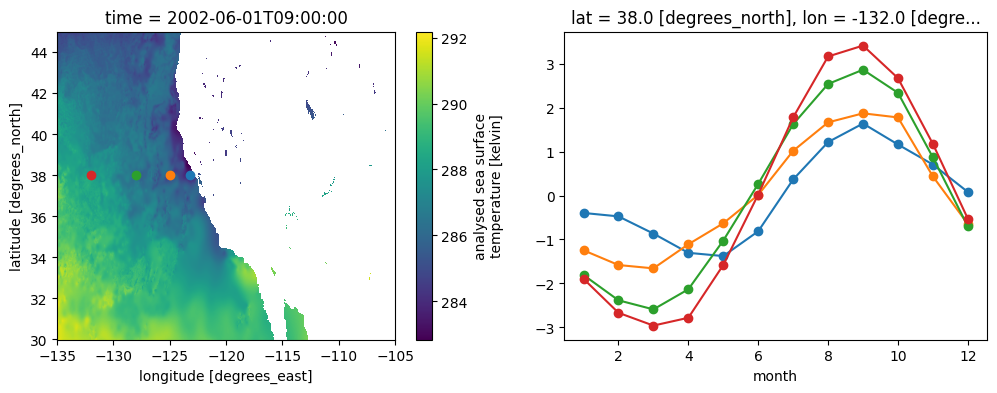

In [71]:
fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4))

## Replot the map and points from the test file:
sst_test.sel(lat=slice(*lat_region), lon=slice(*lon_region)).plot(ax=axes2[0])
for lat, lon in zip(lat_points, lon_points):
    axes2[0].scatter(lon, lat)

## Seasonal cycles on another plot
for lat, lon in zip(lat_points, lon_points):
    seasonal_cycle.sel(lat=lat, lon=lon).plot(marker='o', ax=axes2[1])

In [72]:
client.shutdown()
cluster.shutdown()